In [1]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 536.4 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Path to the uploaded image
image_path = '/content/messi.jpg'
model_path = '/content/drive/MyDrive/dataset/best_model.pt'
# Load the image
image = Image.open(image_path)

model = YOLO(model_path)

# Perform inference
results = model(image)
print(results)


0: 416x640 1 person, 529.2ms
Speed: 36.0ms preprocess, 529.2ms inference, 30.1ms postprocess per image at shape (1, 3, 416, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'pet', 1: 'person'}
obb: None
orig_img: array([[[ 39,  44,  47],
        [ 40,  45,  48],
        [ 42,  46,  51],
        ...,
        [ 54,  53,  55],
        [ 52,  51,  53],
        [ 50,  49,  51]],

       [[ 37,  42,  45],
        [ 40,  45,  48],
        [ 44,  48,  53],
        ...,
        [ 58,  57,  59],
        [ 56,  55,  57],
        [ 55,  54,  56]],

       [[ 41,  45,  50],
        [ 45,  49,  54],
        [ 48,  54,  61],
        ...,
        [ 62,  64,  65],
        [ 60,  62,  63],
        [ 59,  61,  62]],

       ...,

       [[ 57, 144, 100],
        [ 48, 133,  89],
        [ 47, 126,  83],
        ...,
        [ 55, 129,  87],
        [ 58, 132,  90],
        [ 76, 150, 108]],

       [[ 

In [7]:
import numpy as np

# Convert the image to a NumPy array
image_np = np.array(image)


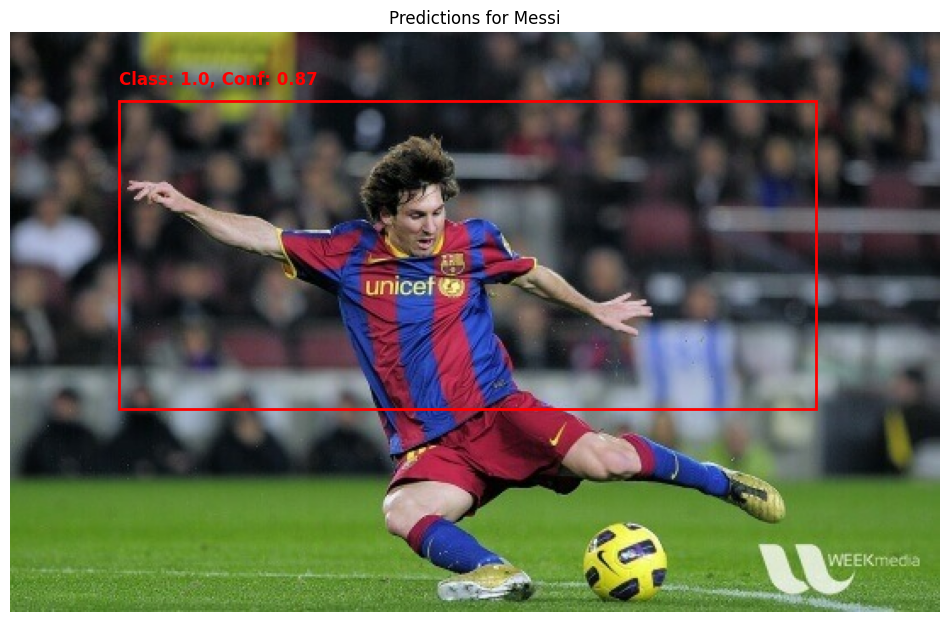

In [8]:

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image_np)

# Plot each bounding box
for result in results:
    for box in result.boxes:
        bbox = box.xyxy[0]  # Bounding box coordinates in (x1, y1, x2, y2) format
        confidence = box.conf[0].item()  # Confidence score
        cls = box.cls[0].item()  # Class index

        # Convert the bounding box to the (x, y, width, height) format
        x1, y1, x2, y2 = bbox.tolist()
        width = x2 - x1
        height = y2 - y1

        # Draw the bounding box
        rect = plt.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Annotate the class and confidence
        label = f'Class: {cls}, Conf: {confidence:.2f}'
        ax.text(x1, y1 - 10, label, color='r', fontsize=12, weight='bold')

# Hide the axes and display the image
plt.axis('off')
plt.title("Predictions for Messi")
plt.show()